In [22]:
import pandas as pd

data = pd.read_csv("Student_performance_data _ (2).csv")
print(data.head())  # This should now work correctly



   StudentID  Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
0       1001   17       1          0                  2        19.833723   
1       1002   18       0          0                  1        15.408756   
2       1003   15       0          2                  3         4.210570   
3       1004   17       1          0                  3        10.028829   
4       1005   17       1          0                  2         4.672495   

   Absences  Tutoring  ParentalSupport  Extracurricular  Sports  Music  \
0         7         1                2                0       0      1   
1         0         0                1                0       0      0   
2        26         0                2                0       0      0   
3        14         0                3                1       0      0   
4        17         1                3                0       0      0   

   Volunteering       GPA  GradeClass  
0             0  2.929196         2.0  
1             0  3

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [26]:
data['Passed'] = (data['GradeClass'] >= 2.0).astype(int)

# Drop non-feature columns (StudentID, GradeClass)
X = data.drop(['StudentID', 'GradeClass'], axis=1)
y = data['Passed']

In [36]:
# Check unique values for each column in the dataset
for column in data.columns:
    print(f"Unique values in '{column}':")
    print(data[column].unique())
    print("\n")
# Count unique values for each column in the dataset
unique_counts = data.nunique()

# Display the count of unique values
print(unique_counts)


Unique values in 'StudentID':
[1001 1002 1003 ... 3390 3391 3392]


Unique values in 'Age':
[17 18 15 16]


Unique values in 'Gender':
[1 0]


Unique values in 'Ethnicity':
[0 2 1 3]


Unique values in 'ParentalEducation':
[2 1 3 4 0]


Unique values in 'StudyTimeWeekly':
[19.83372281 15.40875606  4.21056977 ...  6.80549964 12.41665266
 17.81990749]


Unique values in 'Absences':
[ 7  0 26 14 17 10 22  1 11 15 21  9 16 29  2 25 20  5  8 12 27 23  3 13
  6 28  4 18 19 24]


Unique values in 'Tutoring':
[1 0]


Unique values in 'ParentalSupport':
[2 1 3 4 0]


Unique values in 'Extracurricular':
[0 1]


Unique values in 'Sports':
[0 1]


Unique values in 'Music':
[1 0]


Unique values in 'Volunteering':
[0 1]


Unique values in 'GPA':
[2.92919559 3.04291483 0.11260225 ... 1.14233288 1.80329676 2.14001388]


Unique values in 'GradeClass':
[2. 1. 4. 3. 0.]


Unique values in 'Passed':
[1 0]


StudentID            2392
Age                     4
Gender                  2
Ethnicity           

In [19]:
y

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: Passed, dtype: int32

C:\Users\Awais Munir\AppData\Local\Temp\ipykernel_8552\3065201875.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Passed', data=data, palette='Set2')


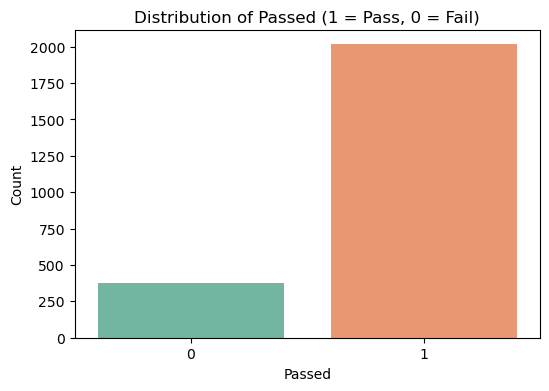

Passed
1    2016
0     376
Name: count, dtype: int64


In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of the 'Passed' column
plt.figure(figsize=(6, 4))
sns.countplot(x='Passed', data=data, palette='Set2')
plt.title('Distribution of Passed (1 = Pass, 0 = Fail)')
plt.xlabel('Passed')
plt.ylabel('Count')
plt.show()

# Check the distribution in numeric form
print(data['Passed'].value_counts())


C:\Users\Awais Munir\AppData\Local\Temp\ipykernel_8552\549493786.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Passed', y=col, data=data, palette='Set2')
C:\Users\Awais Munir\AppData\Local\Temp\ipykernel_8552\549493786.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Passed', y=col, data=data, palette='Set2')
C:\Users\Awais Munir\AppData\Local\Temp\ipykernel_8552\549493786.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Passed', y=col, data=data, palette='Set2')
C:\Users\Awais Munir\AppData\Local\Temp\ipykernel_8552\549

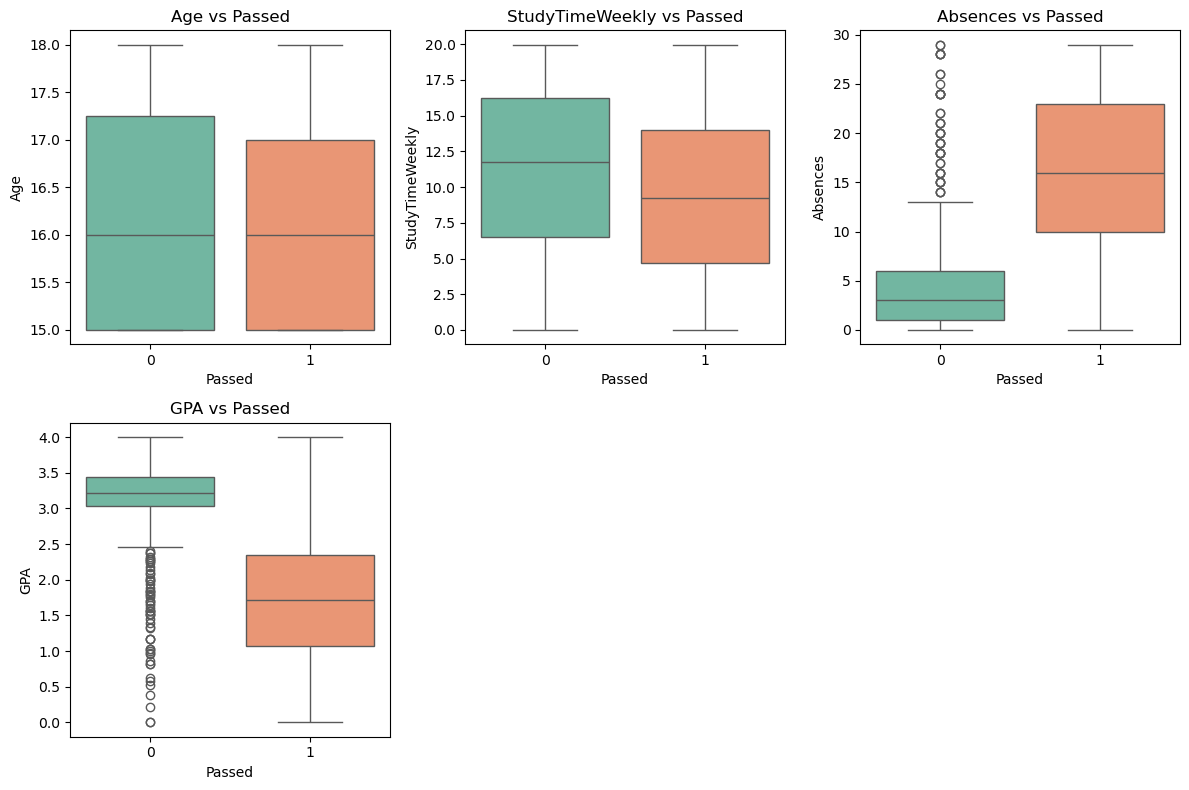

In [39]:
# Boxplot to show the distribution of numerical features by 'Passed'
numerical_columns = ['Age', 'StudyTimeWeekly', 'Absences', 'GPA']
plt.figure(figsize=(12, 8))

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='Passed', y=col, data=data, palette='Set2')
    plt.title(f'{col} vs Passed')

plt.tight_layout()
plt.show()


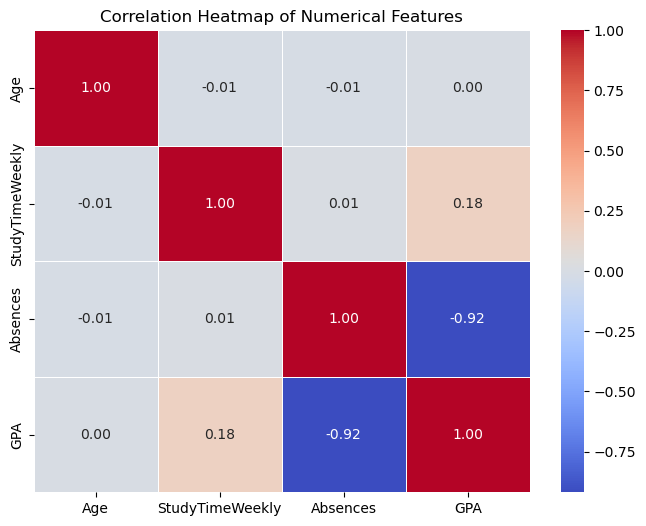

In [34]:
# Correlation heatmap of numerical features
corr_matrix = data[numerical_columns].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


In [20]:
# Encoding categorical variables
le = LabelEncoder()
X['Gender'] = le.fit_transform(X['Gender'])
X['ParentalSupport'] = le.fit_transform(X['ParentalSupport'])

# If needed, scale the data for models like AdaBoost and Gradient Boosting
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [27]:
le = LabelEncoder()
X['Gender'] = le.fit_transform(X['Gender'])
X['Ethnicity'] = le.fit_transform(X['Ethnicity'])
X['ParentalEducation'] = le.fit_transform(X['ParentalEducation'])
X['ParentalSupport'] = le.fit_transform(X['ParentalSupport'])

# Scale features if needed
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Initialize ensemble models
rf = RandomForestClassifier(n_estimators=100, random_state=42)
ada = AdaBoostClassifier(n_estimators=100, random_state=42)
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Train models
rf.fit(X_train, y_train)
ada.fit(X_train, y_train)
gb.fit(X_train, y_train)

f:\UNIVERSITY WORK\Anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


GradientBoostingClassifier(random_state=42)

In [30]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

print("\nRandom Forest Evaluation:")
evaluate_model(rf, X_test, y_test)

print("\nAdaBoost Evaluation:")
evaluate_model(ada, X_test, y_test)

print("\nGradient Boosting Evaluation:")
evaluate_model(gb, X_test, y_test)


Random Forest Evaluation:
Accuracy: 1.0
Confusion Matrix:
[[ 75   0]
 [  0 404]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        75
           1       1.00      1.00      1.00       404

    accuracy                           1.00       479
   macro avg       1.00      1.00      1.00       479
weighted avg       1.00      1.00      1.00       479


AdaBoost Evaluation:
Accuracy: 1.0
Confusion Matrix:
[[ 75   0]
 [  0 404]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        75
           1       1.00      1.00      1.00       404

    accuracy                           1.00       479
   macro avg       1.00      1.00      1.00       479
weighted avg       1.00      1.00      1.00       479


Gradient Boosting Evaluation:
Accuracy: 1.0
Confusion Matrix:
[[ 75   0]
 [  0 404]]
Classification Report:
              precision    recal

In [37]:
from sklearn.model_selection import cross_val_score
models = {'Random Forest': rf, 'AdaBoost': ada, 'Gradient Boosting': gb}

for name, model in models.items():
    scores = cross_val_score(model, X_scaled, y, cv=5)
    print(f"{name} Mean CV Accuracy: {scores.mean():.4f}")

Random Forest Mean CV Accuracy: 0.9987
AdaBoost Mean CV Accuracy: 1.0000


f:\UNIVERSITY WORK\Anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
f:\UNIVERSITY WORK\Anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
f:\UNIVERSITY WORK\Anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
f:\UNIVERSITY WORK\Anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Gradient Boosting Mean CV Accuracy: 1.0000
